
# <center>CREMA-D: Crowd-sourced Emotional Multimodal Actors Dataset</center>
<center> <a href="https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/" /> https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4313618/ </center>
<br>
   
CREMA-D is a labeled data set for the study of multimodal expression and perception of basic acted emotions. The dataset includes __7,442 clips from 91 actors and actresses__, with diverse age and ethnicity, expressing six of the seven "universal emotions": happy, sad, anger, fear, disgust, and neutral (surprise was not considered by the acting directors to be sufficiently specific, as it could relate to any of the other emotions with rapid onset).<br>
There are 91 actors, 48 male and 43 female (51 actors worked with one director, 40 with the another). The actors were between the ages of 20 and 74 with a mean age of 36.
The target emotions were happy, sad, anger, fear, disgust, as well as neutral. There are 12 sentences, each rendered in all of the emotional states. The actors were directed to express the first sentence in three levels of intensity: low, medium, and high. For the remaining 11 sentences the intensity level was unspecified. 

The 12 sentences were:
   - It's eleven o'clock. 
   - That is exactly what happened. 
   - I'm on my way to the meeting.
   - I wonder what this is about.
   - The airplane is almost full.
   - Maybe tomorrow it will be cold.
   - I would like a new alarm clock.
   - I think I have a doctor's appointment.
   - Don't forget a jacket.
   - I think I've seen this before.
   - The surface is slick.
   - We'll stop in a couple of minutes.

The audio files in this dataset are named in such a way that the prefix letters describes the emotion classes as follows:
> __'ANG'__ = 'anger', 
__'DIS'__ = 'disgust', 
__'FEA'__ = 'fear', 
__'HAP'__ = 'happiness', 
__'SAD'__ = 'sadness', 
__'NEU'__ = 'neutral'

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

In [2]:
# make a list of all the wav files
files = glob('archive/*/*.wav')

In [3]:
# play the third audio file
ipd.Audio(files[3])

In [4]:
crema = "archive/AudioWAV/"

crema_dir_list = os.listdir(crema)

file_emotion = []
file_path = []

for file in crema_dir_list:
    # storing file paths
    file_path.append(crema + file)
    # storing file emotions
    part=file.split('_')
    if part[2] == 'ANG':
        file_emotion.append('angry')
    elif part[2] == 'DIS':
        file_emotion.append('disgust')
    elif part[2] == 'FEA':
        file_emotion.append('fear')
    elif part[2] == 'HAP':
        file_emotion.append('happy')
    elif part[2] == 'SAD':
        file_emotion.append('sad')
    elif part[2] == 'NEU':
        file_emotion.append('neutral')
    else:
        file_emotion.append('Unknown')
        
# dataframe for emotion of files
emotion_df = pd.DataFrame(file_emotion, columns=['Emotions'])

# dataframe for path of files.
path_df = pd.DataFrame(file_path, columns=['Path'])
crema_df = pd.concat([emotion_df, path_df], axis=1)
crema_df.head()

,Emotions,Path
0,angry,archive/AudioWAV/1001_DFA_ANG_XX.wav
1,disgust,archive/AudioWAV/1001_DFA_DIS_XX.wav
2,fear,archive/AudioWAV/1001_DFA_FEA_XX.wav
3,happy,archive/AudioWAV/1001_DFA_HAP_XX.wav
4,neutral,archive/AudioWAV/1001_DFA_NEU_XX.wav


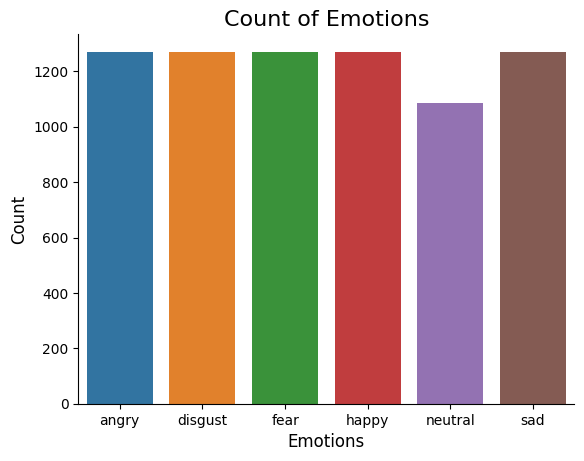

In [5]:
plt.title('Count of Emotions', size=16)
sns.countplot(x=crema_df['Emotions'])
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()

__Observation:__ The emotions are evenly distributed with the difference that "neutral" has less audio files.

In [6]:
# load the audio as a waveform 'y'
# store the sampling rate as sr
y, sr = librosa.load(files[0])
print(f'y:{y[:10]}')
print(f'Shape y: {y.shape}')
print(f'sr: {sr}')

y:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Shape y: (50177,)
sr: 22050


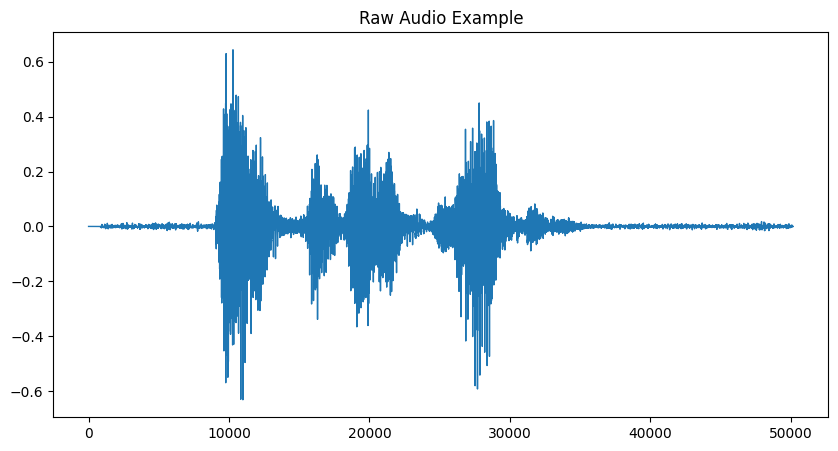

In [7]:
pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Example')
plt.show()

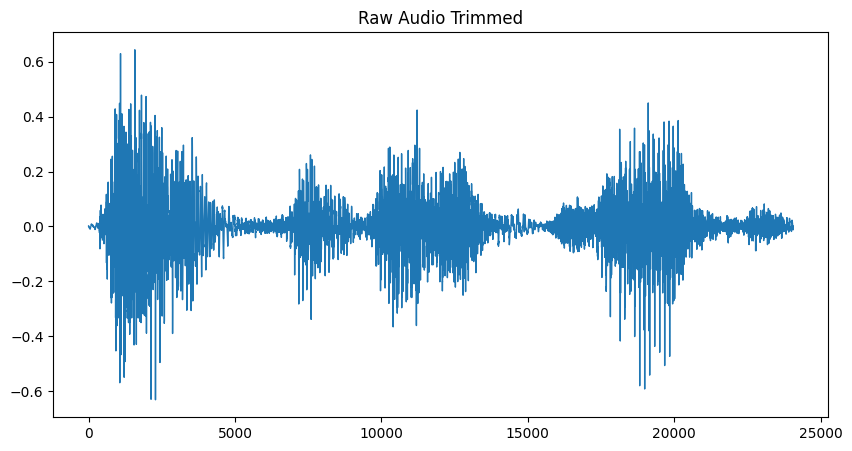

In [8]:
# trimming leading silence (the white spaces)
y_trimmed, _ = librosa.effects.trim(y, top_db=20)
pd.Series(y_trimmed).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Trimmed')
plt.show()

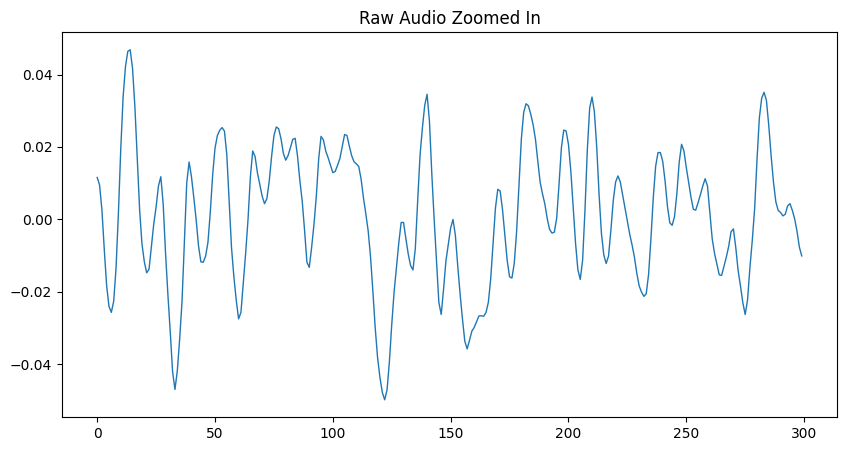

In [9]:
pd.Series(y[30000:30300]).plot(figsize=(10, 5),
                  lw=1,
                  title='Raw Audio Zoomed In')
plt.show()

In [10]:
# look at the different frequencies and how powerful they are
# extract the frequencies sounding at different parts of the audio
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db.shape

(1025, 99)

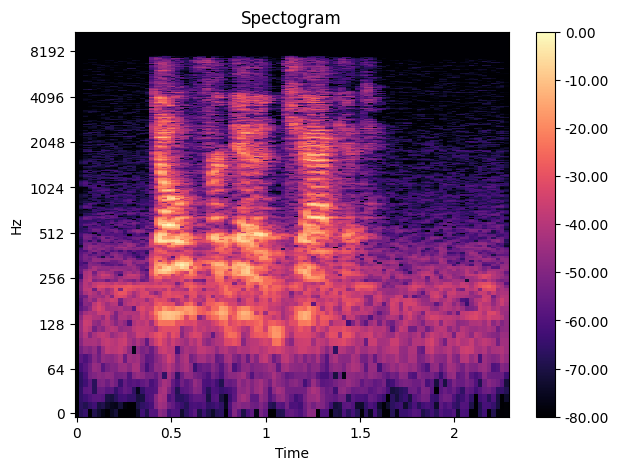

In [19]:
# plot the transformed audio data
fig, ax = plt.subplots(figsize=(7, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectogram', fontsize=12)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

## Visualizing with waveplots and spectograms

In [22]:
# function to show a waveplot of the audio
# where sr => sampling rate and em => emotion
def create_waveplot(data, sr, em):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(em), size=12)
    librosa.display.waveshow(data, sr=sr)
    plt.show()

# function to create a spectogram
def create_spectrogram(data, sr, em):
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(em), size=12)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    plt.colorbar()

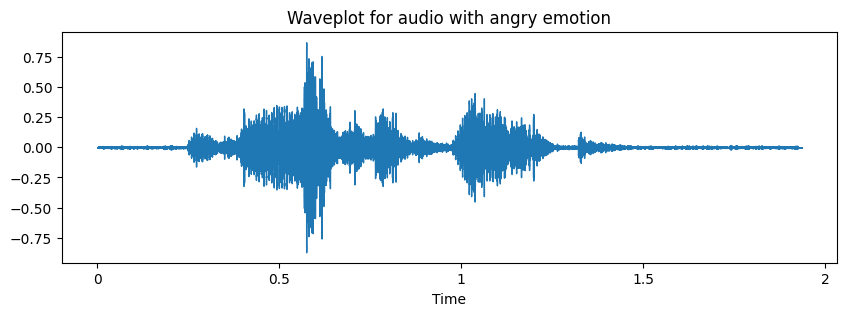

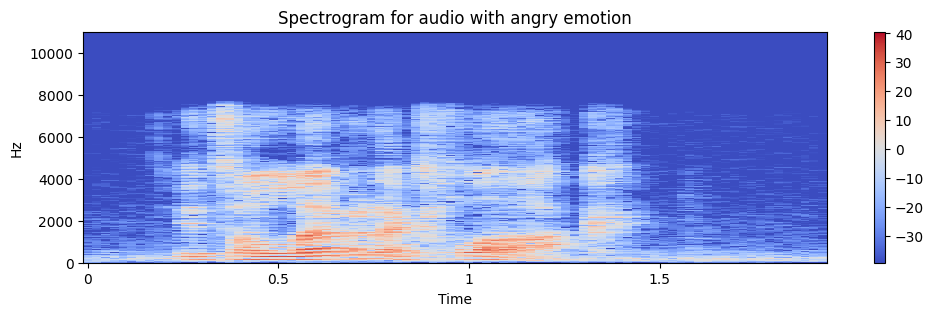

In [23]:
from IPython.display import Audio

emotion = 'angry'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

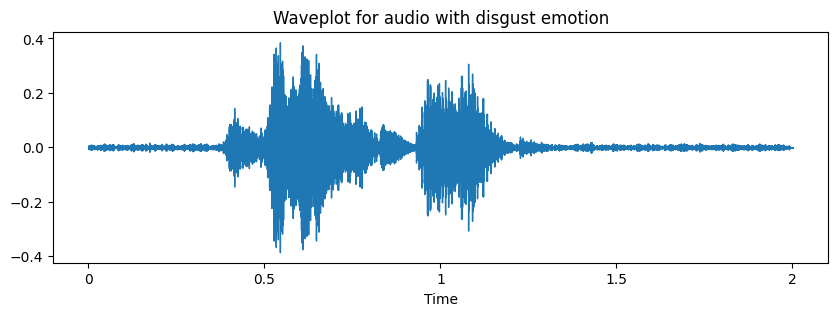

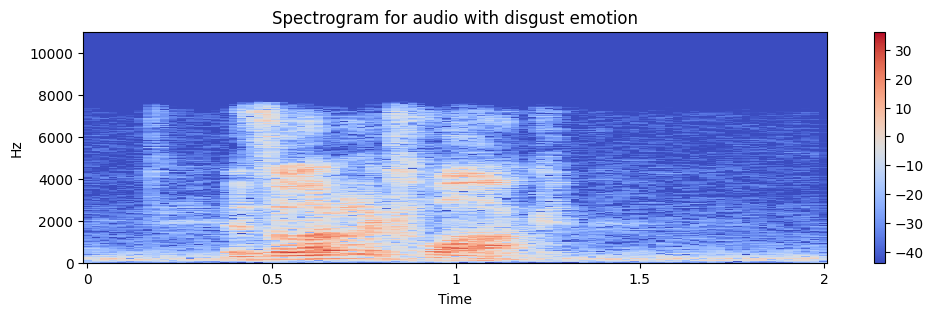

In [24]:
emotion = 'disgust'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

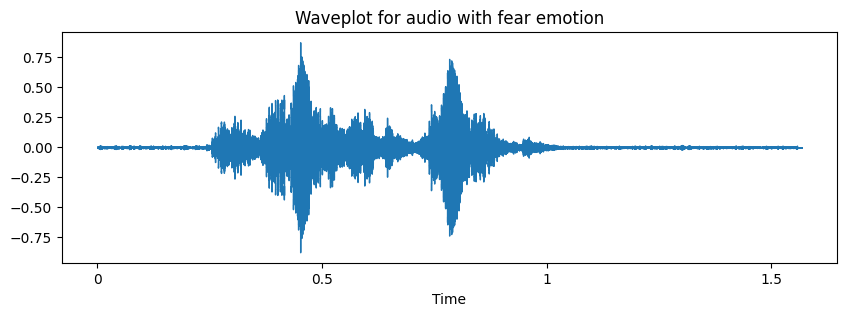

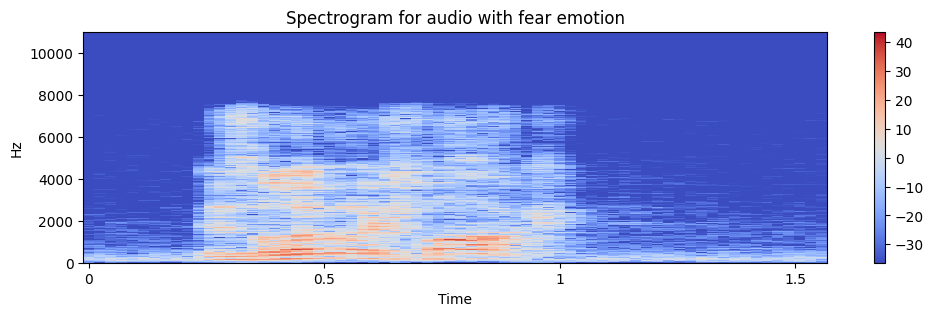

In [25]:
emotion = 'fear'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

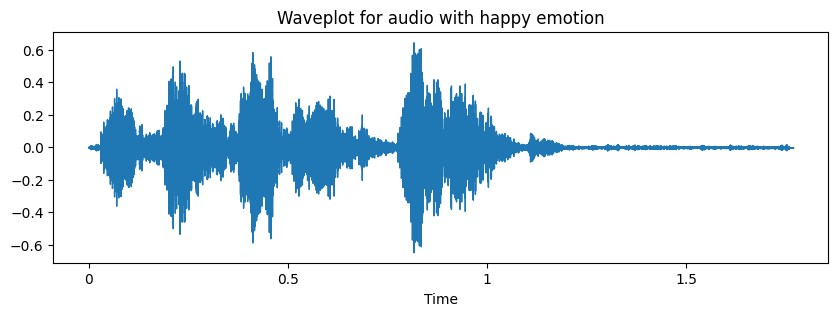

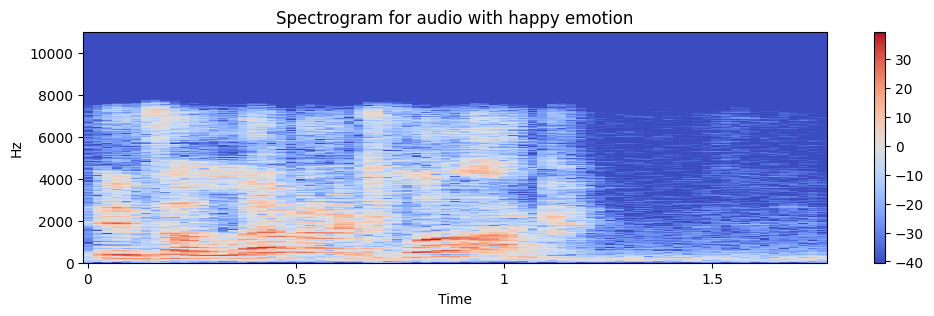

In [26]:
emotion = 'happy'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

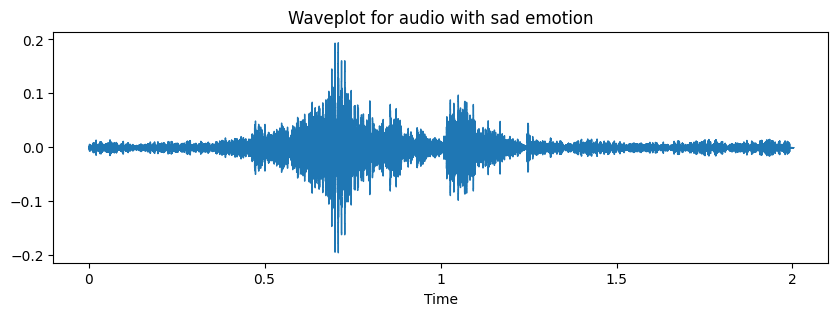

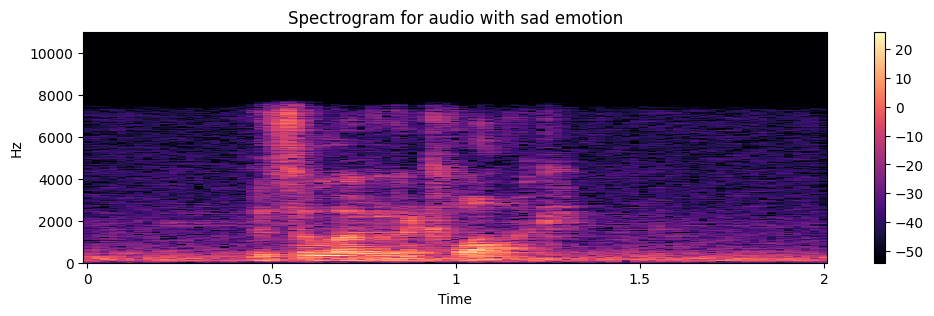

In [27]:
emotion = 'sad'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)

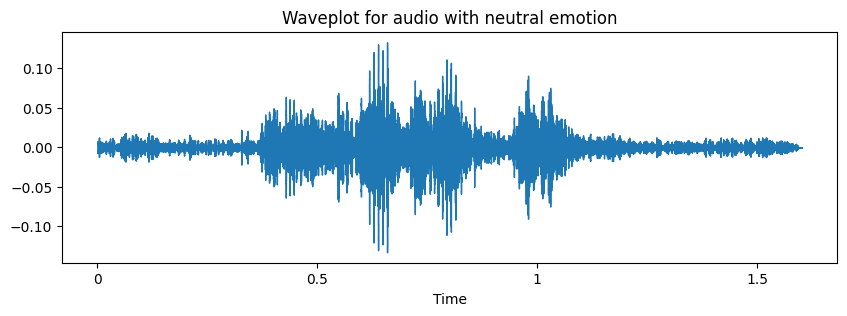

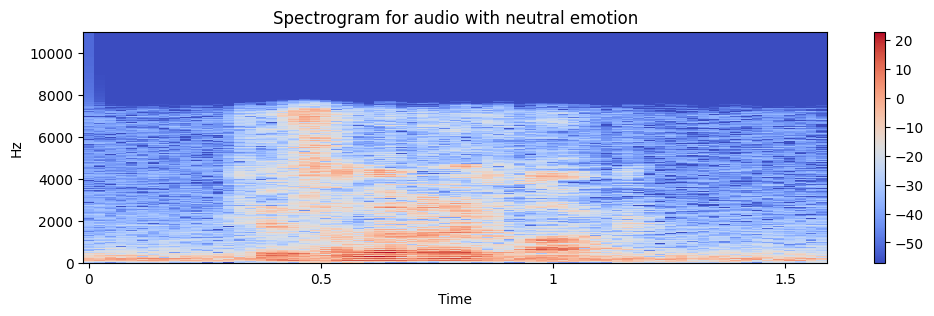

In [28]:
emotion = 'neutral'
path = np.array(path_df.Path[crema_df.Emotions==emotion])[1]
data, sampling_rate = librosa.load(path)

create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)